In [135]:
import os, sys, csv
import warnings
import numpy as np
import nibabel as nb
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
warnings.filterwarnings("ignore")
%matplotlib inline


In [4]:
list_name    = '/data/pt_mar006/documents/all_sd_after_qc_nohistory.txt'
with open(list_name) as f:
    subject_list = f.read().splitlines()
print(len(subject_list))


28


In [18]:
file_beh  = '/data/pt_mar006/documents/table.xlsx'
db        = pd.read_excel(file_beh, index_col='ID')

In [24]:
db.ix[subject_list].keys()

Index([u'vascular stroke',             u'age',             u'sex',
         u'lesion volume',       u'scan days',           u'NIHSS',
               u'NIHSS.1',              u'rS',            u'rS.1',
                  u'rS.2',          u'LESION',     u'Unnamed: 12',
           u'Unnamed: 13',     u'Unnamed: 14',        u'P-values',
            u'P-values.1',      u'P-values.2'],
      dtype='object')

In [38]:
db.ix[subject_list][[u'lesion volume', u'rS', u'rS.1', u'rS.2']]

,lesion volume,rS,rS.1,rS.2
ID,,,,
sd02,5.184,0.163259,-0.278337,0.272443
sd05,7.479,0.143888,-0.0585291,0.298901
sd08,4.077,-0.0632316,0.152462,-0.13256
sd10,3.645,-0.010591,0.0449066,0.0873254
sd13,1.863,0.0351425,-0.0311335,0.166316
sd14,1.215,0.106863,-0.130274,0.1473
sd16,2.025,-0.194615,0.133681,0.10765
sd17,2.106,0.0916421,0.388081,0.0663102
sd21,14.094,0.0724997,0.0881166,0.184781


# correlation values (concordance vs functional distance) vs lesion volume for each of gradients 1,2,3

In [55]:
stats.pearsonr(db.ix[subject_list][u'lesion volume'].values.astype(float), 
               db.ix[subject_list][u'rS'].values.astype(float))

(0.10918756775466477, 0.5802067428029203)

In [56]:
stats.pearsonr(db.ix[subject_list][u'lesion volume'].values.astype(float), 
               db.ix[subject_list][u'rS.1'].values.astype(float))

(0.22094738175809098, 0.2585295634132035)

In [57]:
stats.pearsonr(db.ix[subject_list][u'lesion volume'].values.astype(float), 
               db.ix[subject_list][u'rS.2'].values.astype(float))

(0.15143997794605635, 0.44173733093565526)

# lesion volume versus r(G1)

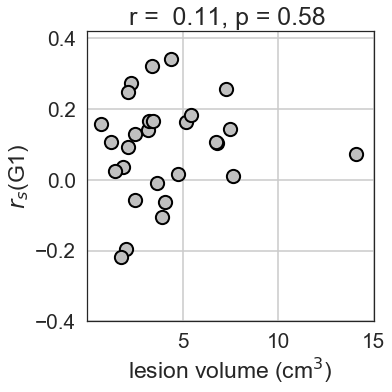

In [101]:
sns.set_context('poster', font_scale=1.3)
sns.set_style("ticks")
sns.set_style("whitegrid")
plt.rcParams["axes.grid"] = True

with plt.style.context("seaborn-white"):
    plt.rcParams["axes.grid"] = True

    fig = plt.figure(figsize=(6, 6))
    ax1 = fig.add_subplot(111)

    plt.scatter(db.ix[subject_list][u'lesion volume'].values.astype(float),
                db.ix[subject_list][u'rS'].values.astype(float),
                facecolors = 'silver',
                edgecolors='k',
                s=175,
                linewidth=2,
                )
    
    myR , myP = (stats.pearsonr(db.ix[subject_list][u'lesion volume'].values.astype(float), 
                                db.ix[subject_list][u'rS'].values.astype(float)))
    
    plt.title('r =  %1.2f, p = %1.2f ' % (myR, myP))

    plt.xlabel('lesion volume (cm$^3$)')
    plt.ylabel('$r_s$(G1)')
    plt.yticks([-0.4, -0.2, 0, 0.2, 0.4])    
    plt.ylim([-0.40, 0.42])
    plt.xticks([5, 10, 15])
    plt.xlim([0, 15])
    

fig.tight_layout()

In [102]:
fig.savefig('/data/pt_mar006/figures/figures_review_2/corr_G1_volume.png',
            format='png', dpi=600)

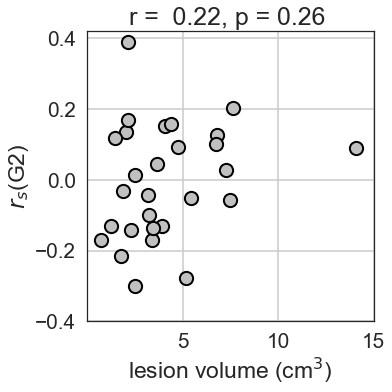

In [99]:
sns.set_context('poster', font_scale=1.3)
sns.set_style("ticks")
sns.set_style("whitegrid")
plt.rcParams["axes.grid"] = True

with plt.style.context("seaborn-white"):
    plt.rcParams["axes.grid"] = True

    fig = plt.figure(figsize=(6, 6))
    ax1 = fig.add_subplot(111)

    plt.scatter(db.ix[subject_list][u'lesion volume'].values.astype(float),
                db.ix[subject_list][u'rS.1'].values.astype(float),
                facecolors = 'silver',
                edgecolors='k',
                s=175,
                linewidth=2,
                )
    
    myR , myP = (stats.pearsonr(db.ix[subject_list][u'lesion volume'].values.astype(float), 
                                db.ix[subject_list][u'rS.1'].values.astype(float)))
    
    plt.title('r =  %1.2f, p = %1.2f ' % (myR, myP))

    plt.xlabel('lesion volume (cm$^3$)')
    plt.ylabel('$r_s$(G2)')
    plt.yticks([-0.4, -0.2, 0, 0.2, 0.4])    
    plt.ylim([-0.40, 0.42])
    plt.xticks([5, 10, 15])
    plt.xlim([0, 15])
    

fig.tight_layout()

In [100]:
fig.savefig('/data/pt_mar006/figures/figures_review_2/corr_G2_volume.png',
            format='png', dpi=600)

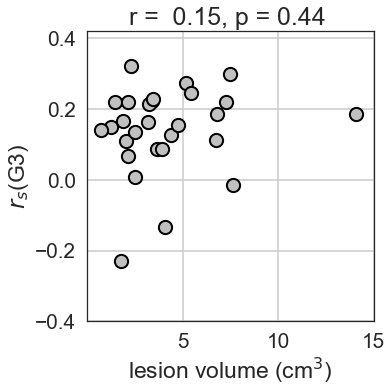

In [133]:
sns.set_context('poster', font_scale=1.3)
sns.set_style("ticks")
sns.set_style("whitegrid")
plt.rcParams["axes.grid"] = True

with plt.style.context("seaborn-white"):
    plt.rcParams["axes.grid"] = True

    fig = plt.figure(figsize=(6, 6))
    ax1 = fig.add_subplot(111)

    plt.scatter(db.ix[subject_list][u'lesion volume'].values.astype(float),
                db.ix[subject_list][u'rS.2'].values.astype(float),
                facecolors = 'silver',
                edgecolors='k',
                s=175,
                linewidth=2
                )
    
    myR , myP = (stats.pearsonr(db.ix[subject_list][u'lesion volume'].values.astype(float), 
                                db.ix[subject_list][u'rS.2'].values.astype(float)))
    
    plt.title('r =  %1.2f, p = %1.2f ' % (myR, myP))

    plt.xlabel('lesion volume (cm$^3$)')
    plt.ylabel('$r_s$(G3)')
    plt.yticks([-0.4, -0.2, 0, 0.2, 0.4])    
    plt.ylim([-0.40, 0.42])
    plt.xticks([5, 10, 15])
    plt.xlim([0, 15])
    

fig.tight_layout()

In [134]:
fig.savefig('/data/pt_mar006/figures/figures_review_2/corr_G3_volume.png',
            format='png', dpi=600)

In [208]:
db.ix[subject_list]['lesion volume'].min(), db.ix[subject_list]['lesion volume'].max() 

(0.729, 14.094)

# yeo colors

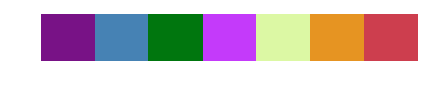

In [136]:
from matplotlib.colors import ListedColormap

convertYeo7 = [3,6,7,1,5,2,4]
cols7 = (#(255,255,255),
         (120,  18, 134),
         (70 ,130, 180),
         ( 0 ,118 , 14),
         (196 , 58 ,250),
         (220 ,248 ,164),
         (230, 148,  34),
         (205 , 62,  78 ))
cols = cols7
cols = np.asarray(cols, dtype=float)/255
yeoColors = ListedColormap(cols,name='colormapYeo')

num = 256
gradient = range(num)
for x in range(5):
    gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots(nrows=1)
ax.imshow(gradient, cmap=yeoColors, interpolation='nearest')
ax.set_axis_off()
fig.tight_layout()

plt.show()

# labelling gradients with yeo networks

In [140]:
comp_file_01 = '/data/pt_mar006/subjects_group/mni3_component_1.nii.gz'
comp_file_04 = '/data/pt_mar006/subjects_group/mni3_component_4.nii.gz'

image_mask = os.path.join('/data/pt_mar006/subjects_group',
                          'mni3_rest_gm_mask.nii.gz')

gm_mask = nb.load(image_mask).get_data()
x    = np.where(gm_mask==1)[0]
y    = np.where(gm_mask==1)[1]
z    = np.where(gm_mask==1)[2]

comp_01     = np.array(nb.load(comp_file_01).get_data())
comp_04     = np.array(nb.load(comp_file_04).get_data())

cmp_01_array = comp_01[x,y,z]
cmp_04_array = comp_04[x,y,z]



# Gradient 1 & 4

In [145]:
B = nb.load('/data/pt_mar006/subjects_group/yeo_7_mni3mm.nii.gz').get_data()
tmp_B = B[:,:,:,0]
tmp_B.shape

(61, 73, 61)

In [148]:
yeolabels = tmp_B[x,y,z]

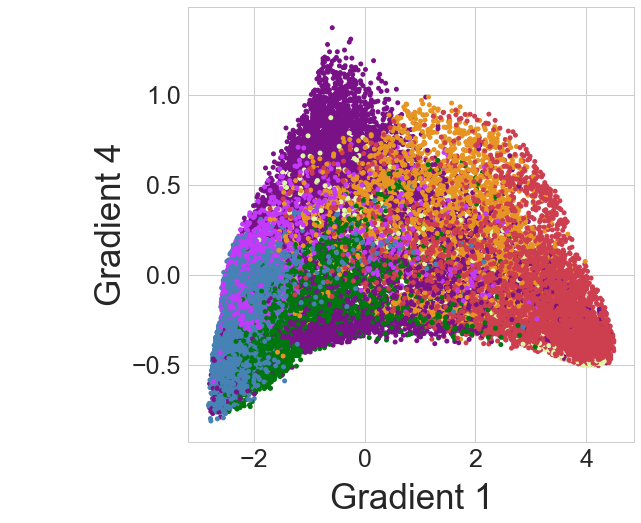

In [149]:
figure = plt.figure(figsize=(8,8), facecolor='w')

ax     = figure.gca()
ax.patch.set_facecolor('white')

xLabel = ax.set_xlabel('\nGradient 1', linespacing=0, fontsize=35)
yLabel = ax.set_ylabel('\nGradient 4', linespacing=3.1, fontsize=35)


ax.scatter(cmp_01_array, cmp_04_array, 
           s = 100,
           c = yeolabels,
           cmap = yeoColors,
           vmin=  1.0,
           vmax = 7.0,
           alpha = 1,
           linewidth = 0,
           marker = '.',)


# kde distribution of lesions along gradients

In [150]:
def get_lesion_loc(comp_file,
                   gm_file,
                   les_file):

    COMP     = np.array(nb.load(comp_file).get_data())

    gm_mask = nb.load(gm_file).get_data()
    x    = np.where(gm_mask==1)[0]
    y    = np.where(gm_mask==1)[1]
    z    = np.where(gm_mask==1)[2]

    # where would be the lesion along the component
    lesion = np.array(nb.load(les_file).get_data())
    x_le   = np.where(lesion==1)[0]
    y_le   = np.where(lesion==1)[1]
    z_le   = np.where(lesion==1)[2]

    lesion_loc = COMP[x_le, y_le, z_le]

    return lesion_loc

In [151]:
list_name    = '/data/pt_mar006/documents/all_sd_after_qc_nohistory.txt'
with open(list_name) as f:
    subject_list = f.read().splitlines()

data_dir     = '/data/pt_mar006/subjects_masks/'

image_mask = os.path.join('/data/pt_mar006/subjects_group',
                          'mni3_rest_gm_mask.nii.gz')

gm_mask = nb.load(image_mask).get_data()
x    = np.where(gm_mask==1)[0]
y    = np.where(gm_mask==1)[1]
z    = np.where(gm_mask==1)[2]

In [159]:
comp_file_01 = os.path.join('/data/pt_mar006/subjects_group',
                            'mni3_component_1.nii.gz')
COMP_01      = np.array(nb.load(comp_file_01).get_data())
comp_vec_01  = COMP_01[x,y,z]
bin_num      = 20

bins_hard_01 = np.linspace(comp_vec_01.min(), comp_vec_01.max(), 
                           bin_num+1)
print bins_hard_01

les_loc_01 = np.zeros((1))
for subject_id in subject_list:
    gm_file     = os.path.join(data_dir, subject_id, 
                               'gm_mask_no_lesion.nii.gz')
    les_file    = os.path.join(data_dir, subject_id, 
                               'lesion_mask_mni_dilated_gm.nii.gz')
    les_loc_tmp = get_lesion_loc(comp_file_01,
                                 gm_file,
                                 les_file)
    les_loc_01 = np.append(les_loc_01, les_loc_tmp)

print len(les_loc_01)

tmp_01 = []
for i in range(len(les_loc_01)):
    for j in range(len(bins_hard_01)):
        if bins_hard_01[j]<les_loc_01[i] and les_loc_01[i]<bins_hard_01[j+1]:
            tmp_01.append(j)

x_01  = np.array(tmp_01)

kde_01  = stats.gaussian_kde(x_01)
xxx_01  = np.linspace(0, N, )


#x_01

[-2.8194961  -2.45357792 -2.08765974 -1.72174157 -1.35582339 -0.98990521
 -0.62398703 -0.25806885  0.10784933  0.4737675   0.83968568  1.20560386
  1.57152204  1.93744022  2.3033584   2.66927657  3.03519475  3.40111293
  3.76703111  4.13294929  4.49886746]
2435


In [162]:
comp_file_04 = os.path.join('/data/pt_mar006/subjects_group',
                            'mni3_component_4.nii.gz')
COMP_04      = np.array(nb.load(comp_file_04).get_data())
comp_vec_04  = COMP_04[x,y,z]
bin_num      = 20

bins_hard_04 = np.linspace(comp_vec_04.min(), comp_vec_04.max(), 
                           bin_num+1)
print bins_hard_04

les_loc_04 = np.zeros((1))

for subject_id in subject_list:
    gm_file     = os.path.join(data_dir, subject_id, 
                               'gm_mask_no_lesion.nii.gz')
    les_file    = os.path.join(data_dir, subject_id, 
                               'lesion_mask_mni_dilated_gm.nii.gz')
    les_loc_tmp = get_lesion_loc(comp_file_04,
                                 gm_file,
                                 les_file)
    les_loc_04 = np.append(les_loc_04, les_loc_tmp)

print len(les_loc_04)

tmp_04 = []
for i in range(len(les_loc_04)):
    for j in range(len(bins_hard_04)):
        if bins_hard_04[j]<les_loc_04[i] and les_loc_04[i]<bins_hard_04[j+1]:
            tmp_04.append(j)

x_04  = np.array(tmp_04)
x_04

kde_04  = stats.gaussian_kde(x_04)
xxx_04  = np.linspace(0, N, )

[-0.81021923 -0.70114938 -0.59207954 -0.4830097  -0.37393985 -0.26487001
 -0.15580017 -0.04673032  0.06233952  0.17140936  0.28047921  0.38954905
  0.49861889  0.60768874  0.71675858  0.82582842  0.93489827  1.04396811
  1.15303795  1.2621078   1.37117764]
2435


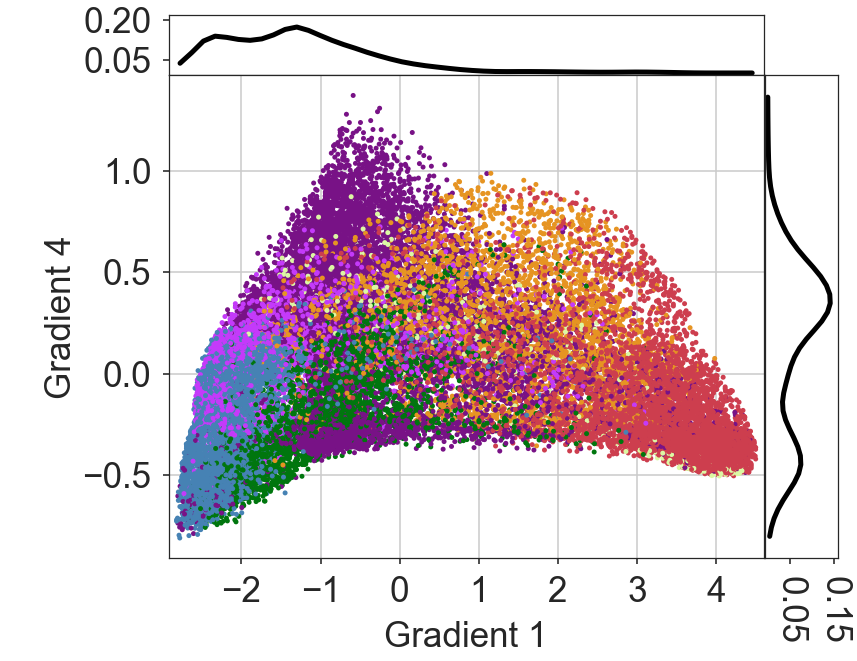

In [163]:
import matplotlib.gridspec as gridspec
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("poster")
sns.set_style("ticks")

fig = plt.figure(1, figsize=(12, 10))

gs = gridspec.GridSpec(9, 9)
gs.update(wspace=0.02, hspace=0.01)

ax1 = plt.subplot(gs[0, :-1])
ax2 = plt.subplot(gs[1:, :-1])
ax3 = plt.subplot(gs[1:, -1])

ax1.plot(xxx_01, kde_01(xxx_01), 
         'k', linewidth=5)

ax1.grid(False)
ax1.set_xlim(bins.min()-0.4, bins.max()+0.4)
ax1.set_ylim(-0.006, 0.22)
ax1.tick_params(axis='x',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom='off',      # ticks along the bottom edge are off
                top='off',         # ticks along the top edge are off
                labelbottom='off')

ax1.set_yticks([0.05,  0.2])
ax1.set_yticklabels(["%.2f" % member for member in [0.05, 0.20]] , fontsize=35)



ax2.scatter(cmp_01_array, cmp_04_array, 
           s = 100,
           c = yeolabels,
           cmap = yeoColors,
           vmin=  1.0,
           vmax = 7.0,
           alpha = 1,
           linewidth = 0,
           marker = '.',)
ax2.set_xticks([-2, -1, 0, 1, 2, 3, 4])
ax2.set_yticks([-1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5])

ax2.grid(True)
ax2.set_xlabel('\nGradient 1', linespacing=0.05, fontsize=35)
ax2.set_ylabel('\nGradient 4', fontsize=35)
ax2.set_xlim(cmp_01_array.min()-0.1, cmp_01_array.max()+0.1)
ax2.set_ylim(cmp_04_array.min()-0.1, cmp_04_array.max()+0.1)
ax2.tick_params(axis='both', which='major', labelsize=35)

ax3.plot(kde_04(xxx_04), xxx_04, 
         'k', linewidth=5)
ax3.grid(False)
ax3.set_yticks([])
ax3.set_xticks([0.05,  0.15])
ax3.set_xticklabels(["%.2f" % member for member in [0.05,  0.15]], rotation=270, fontsize=35)
ax3.set_xlim(-0.006, 0.16)

plt.tight_layout()



In [164]:
#fig.savefig('/data/pt_mar006/figures/figures_review_2/grad_1_4.png',
#            dpi=600, format='png', bbox_inches='tight')

# concordance vs functional distance analysis for gradient 4

In [165]:
def distance_to_lesion(comp_file, concor_file, 
                       gm_file, les_file, model='spear'):

    COMP     = np.array(nb.load(comp_file).get_data())
    CONCOR   = np.array(nb.load(concor_file).get_data())
    
    gm_mask = nb.load(gm_file).get_data()
    x    = np.where(gm_mask==1)[0]
    y    = np.where(gm_mask==1)[1]
    z    = np.where(gm_mask==1)[2]

    COMPONENT   = COMP[x,y,z]
    CONCORDANCE = CONCOR[x,y,z]

    # where would be the lesion along the component
    lesion = np.array(nb.load(les_file).get_data())
    x_le   = np.where(lesion==1)[0]
    y_le   = np.where(lesion==1)[1]
    z_le   = np.where(lesion==1)[2]

    LESION = COMP[x_le, y_le, z_le]

    # define distance array
    d = np.zeros(len(COMPONENT))

    for i in range(0, len(COMPONENT)):        
            d[i] = min(abs(COMPONENT[i] - LESION))
    
    if model == 'spear':
        r, p = stats.spearmanr(d, CONCORDANCE)
    elif model == 'pear':
        r, p = stats.pearsonr(d, CONCORDANCE)
        
    return d, CONCORDANCE, COMPONENT, LESION, r, p

In [166]:
def get_df_all(concordance_file_name, data_dir, 
               comp_file_list, subject_list, 
               comp_columns, model = 'spear'): 
    
    rComps = pd.DataFrame(index=subject_list, 
                          columns=comp_columns)

    for comp_file in comp_file_list:
        
            col = 'comp_' + os.path.basename(comp_file[-8:-7])
      
            for subject_id in subject_list:              
                # get filenames...
                concor_file = os.path.join(data_dir, subject_id, 
                                           concordance_file_name)
                gm_file     = os.path.join(data_dir, subject_id, 
                                           'gm_mask_no_lesion.nii.gz')
                les_file    = os.path.join(data_dir, subject_id, 
                                           'lesion_mask_mni_gm.nii.gz')
                # run distance_to_lesion for each subject
                d, conc, comp, les, r, p  = distance_to_lesion(comp_file,
                                                           concor_file,
                                                           gm_file,
                                                           les_file,
                                                           model=model)
                rComps.ix[subject_id][col] = r
                #rComps.ix[subject_id][col + '_pval'] = "{:.6f}".format(p)
    return rComps


In [167]:
data_dir  = '/data/pt_mar006/subjects_masks/'

comp_file_list = ['/data/pt_mar006/subjects_group/mni3_component_4.nii.gz']

comp_columns = ['comp_4', #'comp_4_pval',
               ]

list_name    = '/data/pt_mar006/documents/all_sd_after_qc_nohistory.txt'
with open(list_name) as f:
    subject_list = f.read().splitlines()

In [168]:
df_ccc_spear = get_df_all('conc_ccc.nii.gz',
                           data_dir,
                           comp_file_list,
                           subject_list,
                           comp_columns,
                           model = 'spear')

In [172]:
rComps = df_ccc_spear

rComps = rComps.rename(columns={"comp_4": "Gradient 4"})

rComps

,Gradient 4
sd02,0.17314
sd05,-0.200804
sd08,-0.0580302
sd10,-0.126599
sd13,0.163625
sd14,-0.322782
sd16,-0.45739
sd17,0.203601
sd21,-0.338236
sd25,0.325202


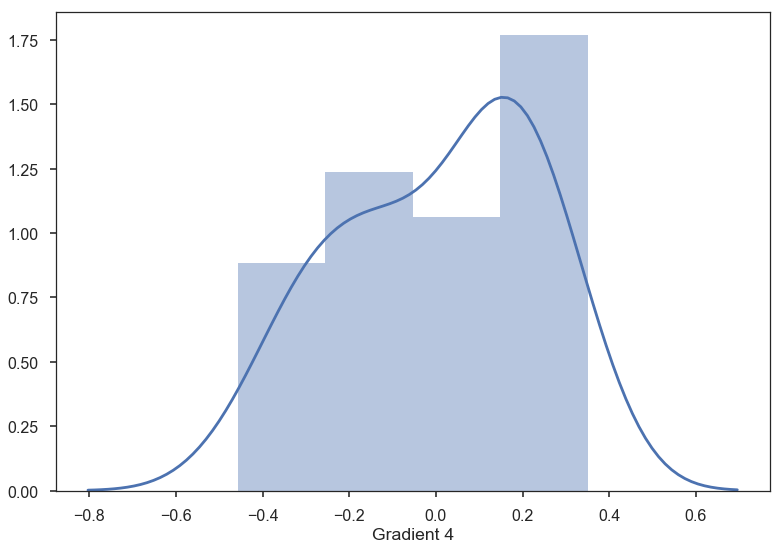

In [175]:
sns.distplot(np.array(df_ccc_spear.comp_4, dtype=float), axlabel='Gradient 4')

In [177]:
t, p = stats.wilcoxon(np.array(df_ccc_spear.comp_4, dtype=float), 
                      y=None, zero_method='zsplit', correction=True)

print "t and p : ", t, p
print "median: ", df_ccc_spear.comp_4.median(), 
print "mean: ", df_ccc_spear.comp_4.mean(), 
print "std: ", df_ccc_spear.comp_4.std()
print "max: ", rComps['Gradient 4'].max(),
print "min: ", rComps['Gradient 4'].min()

t and p :  192.0 0.8110280838873929
median:  0.04709146939832062 mean:  0.0061443817387088215 std:  0.22841264376651632
max:  0.3502449036912735 min:  -0.45738965965020273


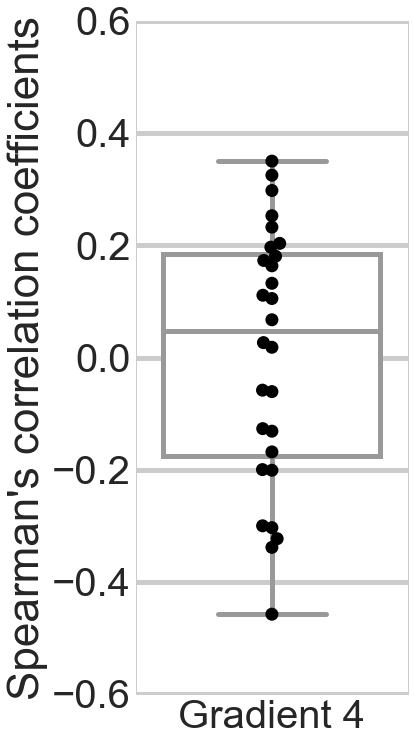

In [203]:
fig, ax1 = plt.subplots(1, 1,  figsize=(7,11.7))
    
sns.set(context="paper", 
        font="sans-serif", 
        font_scale=5.0,
        style="whitegrid",
        rc={"grid.linewidth": 5},
        palette='Set2')
    
sns.boxplot(data=rComps, 
            linewidth = 5,
            color='white',
            ax=ax1)

sns.swarmplot(data=rComps,
              color='k',
              size = 13,
              ax=ax1)

# one-tailed Wilcoxon signed-rank test 
from scipy import stats
popmean=0
cols = ['Gradient 4']
    
x_axis = 0.335
for col in cols:        
    r    = rComps[col].median()

    t, p = stats.wilcoxon(np.array(rComps[col], dtype=float), 
                          y=None, zero_method='zsplit', 
                          correction=True)
    # one-tailed
    p = p
    if p < 0.05 and t > 0:
        fig.text(x_axis, 0.815, "*" % (p), fontname='sans-serif', 
                 size=73, rotation=0, backgroundcolor = 'white', color = 'k',
                 ha="center", va="center")

ax1.set(ylabel='Spearman\'s correlation coefficients')
plt.ylim([-0.6, 0.6])
fig.tight_layout()    


In [204]:
fig.savefig('/data/pt_mar006/figures/figures_review_2/grad_4_analysis.png',
            dpi=600, format='png', bbox_inches='tight')

# plot Gradient 4 along the surface

In [186]:
import os 
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
import nibabel as nb 
from nibabel import gifti
import nipype.interfaces.freesurfer as fs
from nilearn._utils.compat import _basestring
from nilearn.plotting.img_plotting  import _get_colorbar_and_data_ranges
from nilearn.plotting.surf_plotting import load_surf_data
from nilearn.plotting.surf_plotting import load_surf_mesh
from nilearn import datasets
from nilearn import plotting
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

/data/u_bayrak_software/anaconda2/envs/viz27/lib/python2.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Python2 support is deprecated and will be removed in a future release. Consider switching to Python3.
  # This is added back by InteractiveShellApp.init_path()


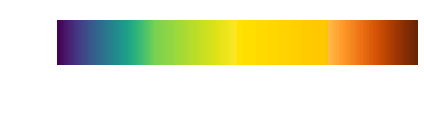

In [187]:
import matplotlib.colors as colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = plt.get_cmap('nipy_spectral')
new_cmap = truncate_colormap(cmap, 0.2, 0.95)

#colors1 = plt.cm.YlGnBu(np.linspace(0, 1, 128))
first = 70
second = 58
third  = 64
fourth = 64

colors1 = plt.cm.viridis(np.linspace(0., 0.80, first))
colors2 = plt.cm.viridis(np.linspace(0.8, 1, second))
colors3 = plt.cm.jet(np.linspace(0.67, 0.7, third))
colors4 = plt.cm.YlOrBr(np.linspace(0.4, 1, fourth))

cols = np.vstack((colors1,colors2, colors3, colors4))
pnasEDITED = colors.LinearSegmentedColormap.from_list('my_colormap', cols)

num = 256
gradient = range(num)
for x in range(5):
    gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots(nrows=1)
ax.imshow(gradient, cmap=pnasEDITED, interpolation='nearest')
ax.set_axis_off()
fig.tight_layout()

plt.show()

In [195]:
def plot_surf_infl(fsaverage, 
                   fsize,
                   surf_map_l=None, 
                   surf_map_r=None,
                   vmin = None,
                   vmax = None,
                   threshold = None,
                   alpha = 0.7,
                   cmap = 'hot',
                   mask_lh=None,
                   mask_rh=None,):

    # load mesh and derive axes limits
    mesh_left  = load_surf_mesh(fsaverage['infl_left'])
    mesh_right = load_surf_mesh(fsaverage['infl_right'])

    coords_left, faces_left   = mesh_left[0], mesh_left[1]
    coords_right, faces_right = mesh_right[0], mesh_right[1]

    #limits =  [-150, 50]
    limits = [-124, 124]
    
    avg_method = 'mean'
    darkness   = 0.3
    
    # if no cmap is given, set to matplotlib default
    if cmap is None:
        cmap = plt.cm.get_cmap(plt.rcParamsDefault['image.cmap'])
    else:
        # if cmap is given as string, translate to matplotlib cmap
        if isinstance(cmap, _basestring):
            cmap = plt.cm.get_cmap(cmap)

    def subplot(surf_map, bg_map, subplot_id, coords, faces, 
                elev, azim, vmin = vmin, vmax = vmax,
                mask=None, mask_lenient=None):

        bg_on_data=False
        
        fig.subplots_adjust(wspace=0, hspace=0)
        
        ax = fig.add_subplot(subplot_id, projection='3d', xlim=limits, ylim=limits)
        #ax.set_axis_bgcolor('white')
        ax.view_init(elev=elev, azim=azim)
        ax.set_axis_off()
        p3dcollec = ax.plot_trisurf(coords[:, 0], coords[:, 1], coords[:, 2],
                                    triangles=faces, linewidth=0.,
                                    antialiased=False, color='red')
        if mask is not None:    
            cmask = np.zeros(len(coords))
            cmask[mask] = 1
            cutoff = 2 
            if mask_lenient: 
                cutoff = 0
            fmask = np.where(cmask[faces].sum(axis=1) > cutoff)[0]

        if bg_map is not None or surf_map is not None:

            face_colors = np.ones((faces.shape[0], 4))
   
            if bg_map is not None:
                bg_data = load_surf_data(bg_map)
                if bg_data.shape[0] != coords.shape[0]:
                    raise ValueError('The bg_map does not have the same number '
                                     'of vertices as the mesh.')
                bg_faces = np.mean(bg_data[faces], axis=1)
                bg_faces = bg_faces - bg_faces.min()
                bg_faces = bg_faces / bg_faces.max()
                # control background darkness
                bg_faces *= darkness
                face_colors = plt.cm.gray_r(bg_faces)

            # modify alpha values of background
            face_colors[:, 3] = alpha * face_colors[:, 3]

            if surf_map is not None:
                surf_map_data = surf_map
                if len(surf_map_data.shape) is not 1:
                    raise ValueError('surf_map can only have one dimension but has'
                                     '%i dimensions' % len(surf_map_data.shape))
                if surf_map_data.shape[0] != coords.shape[0]:
                    raise ValueError('The surf_map does not have the same number '
                                     'of vertices as the mesh.')

                # create face values from vertex values by selected avg methods
                if avg_method   == 'mean':
                    surf_map_faces = np.mean(surf_map_data[faces], axis=1)
                elif avg_method == 'median':
                    surf_map_faces = np.median(surf_map_data[faces], axis=1)

                # if no vmin/vmax are passed figure them out from data
                if vmin is None:
                    vmin = np.nanmin(surf_map_faces)
                if vmax is None:
                    vmax = np.nanmax(surf_map_faces)

                # treshold if inidcated
                if threshold is None:
                    kept_indices = np.where(surf_map_faces)[0]
                else:
                    kept_indices = np.where(np.abs(surf_map_faces) >= threshold)[0]

                surf_map_faces = surf_map_faces - vmin
                surf_map_faces = surf_map_faces / (vmax - vmin)

                # multiply data with background if indicated
                if bg_on_data:
                    face_colors[kept_indices] = cmap(surf_map_faces[kept_indices])\
                        * face_colors[kept_indices]
                else:
                    if mask is None:
                        face_colors[kept_indices] = cmap(surf_map_faces[kept_indices])
                    else:
                        face_colors[fmask] = cmap(surf_map_faces)[fmask] * face_colors[fmask]

            p3dcollec.set_facecolors(face_colors)

    fig = plt.figure(figsize=fsize)
    
    subplot(surf_map_l, fsaverage['sulc_left'], 121, coords_left,  
            faces_left, elev=0, azim=180, mask=mask_lh)

    #subplot(surf_map_l, fsaverage['sulc_left'], 142, coords_left,  
    #        faces_left, elev=0, azim=0, mask=mask_lh)

    #subplot(surf_map_r, fsaverage['sulc_right'], 143, coords_right,  
    #        faces_right, elev=0, azim=180, mask=mask_rh)
    
    subplot(surf_map_r, fsaverage['sulc_right'], 122, coords_right,  
            faces_right, elev=0, azim=0, mask=mask_rh)

    return fig


In [188]:

def map_to_surf(vol_file, hemi_str, out_file):
    sampler = fs.SampleToSurface(hemi=hemi_str)
    sampler.inputs.source_file     = vol_file
    sampler.inputs.mni152reg       = True
    sampler.inputs.sampling_method = "average"
    sampler.inputs.sampling_range  = (0.2, 0.8, 0.2)
    sampler.inputs.sampling_units  = "frac"
    sampler.inputs.target_subject  = 'fsaverage5'
    sampler.inputs.interp_method   = 'nearest'
    sampler.inputs.out_file        = out_file
    res = sampler.run()       
    data =  nb.load(out_file).get_data().reshape(10242,)
    return data



In [189]:
fs5 = datasets.fetch_surf_fsaverage5()

# load mesh and derive axes limits
mesh_left  = load_surf_mesh(fs5['infl_left'])
mesh_right = load_surf_mesh(fs5['infl_right'])

coords_left, faces_left   = mesh_left[0], mesh_left[1]
coords_right, faces_right = mesh_right[0], mesh_right[1]

print coords_left.shape, faces_left.shape
print coords_right.shape, faces_right.shape

(10242, 3) (20480, 3)
(10242, 3) (20480, 3)


In [192]:
vol_filename = '/data/pt_mar006/subjects_group/mni3_component_4.nii.gz'

surfLH_fileout = '/data/pt_mar006/components/mni3_component_4_lh.mgz' 
surfRH_fileout = '/data/pt_mar006/components/mni3_component_4_rh.mgz'

#K_lh = map_to_surf(vol_filename, 'lh', surfLH_fileout)
#K_rh = map_to_surf(vol_filename, 'rh', surfRH_fileout)

K_lh = nb.load(surfLH_fileout).get_data().reshape(10242,)
K_rh = nb.load(surfRH_fileout).get_data().reshape(10242,)


In [193]:
cort_lh = nb.freesurfer.io.read_label('/afs/cbs.mpg.de/software/freesurfer/6.0.0/ubuntu-xenial-amd64/subjects/fsaverage5/label/lh.cortex.label')
cort_rh = nb.freesurfer.io.read_label('/afs/cbs.mpg.de/software/freesurfer/6.0.0/ubuntu-xenial-amd64/subjects/fsaverage5/label/rh.cortex.label')

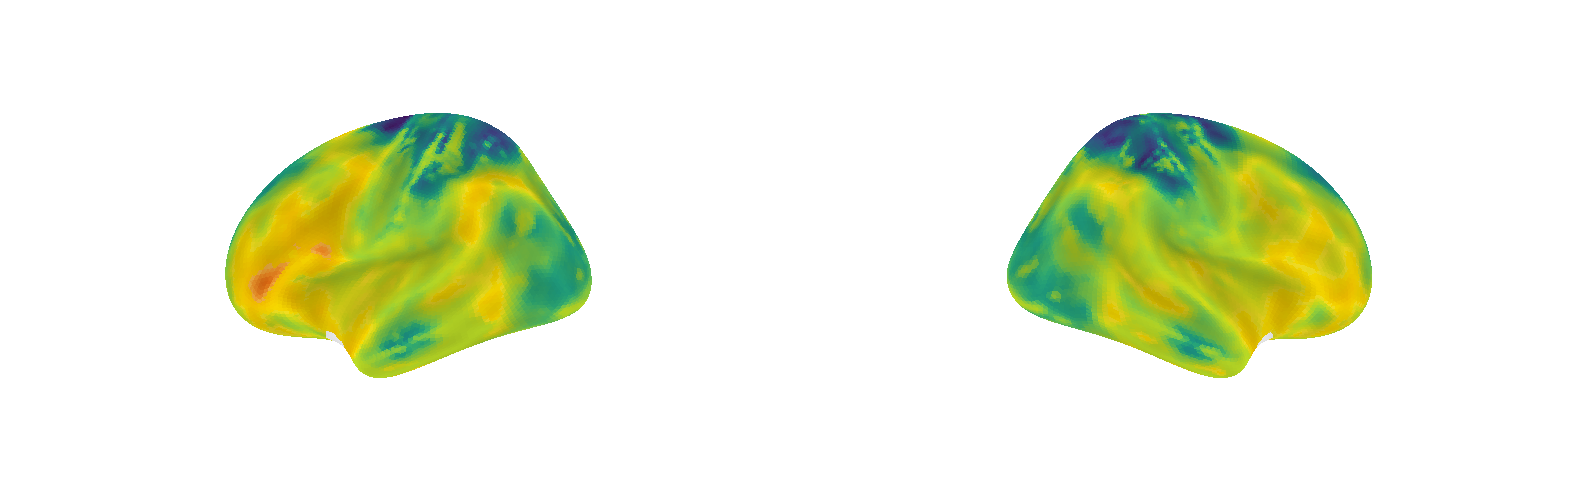

In [197]:
my_min = K_lh.min()
my_max = K_lh.max()

figure = plot_surf_infl(fs5, 
                        fsize=(28, 9),
                        surf_map_l = K_lh, 
                        surf_map_r = K_rh,
                        vmin = my_min,
                        vmax = my_max,
                        threshold = None,
                        alpha = 1.,
                        cmap = pnasEDITED,
                        mask_lh = cort_lh,
                        mask_rh = cort_rh)

In [201]:
my_min, my_max

(-0.79149574, 1.2473648)

In [202]:
figure.savefig('/data/pt_mar006/figures/figures_review_2/grad_4_surface.png',
               dpi=600, format='png', bbox_inches='tight')